# Практическая 2.1. Метод голосования

## Метод Голосования в задачах классификации и регрессии

Вспомогательная функция numpy.bincount - считает количество вхождения чисел от 0 до максимального значения в массиве.

In [1]:
import numpy as np

array1 = [1, 1, 1, 2, 2, 6] 
bin = np.bincount(array1) 
print("Результат bincount: \n ", bin) 
print("Кол-во элементов на выходе: ", bin.size, "\n") 

Результат bincount: 
  [0 3 2 0 0 0 1]
Кол-во элементов на выходе:  7 



In [24]:
import numpy as np

# Каждая модель прогнозирует вероятностное распределение для 3-х классов: [0, 1, 2]
Model1 = [0.9, 0.08, 0.02]
Model2 = [0.1, 0.8, 0.1]
Model3 = [0.01, 0.85, 0.14]
Model4 = [0.25, 0.65, 0.10]
Model5 = [0.05, 0.9, 0.05]

result_predicts = np.stack([Model1, Model2, Model3, Model4, Model5])


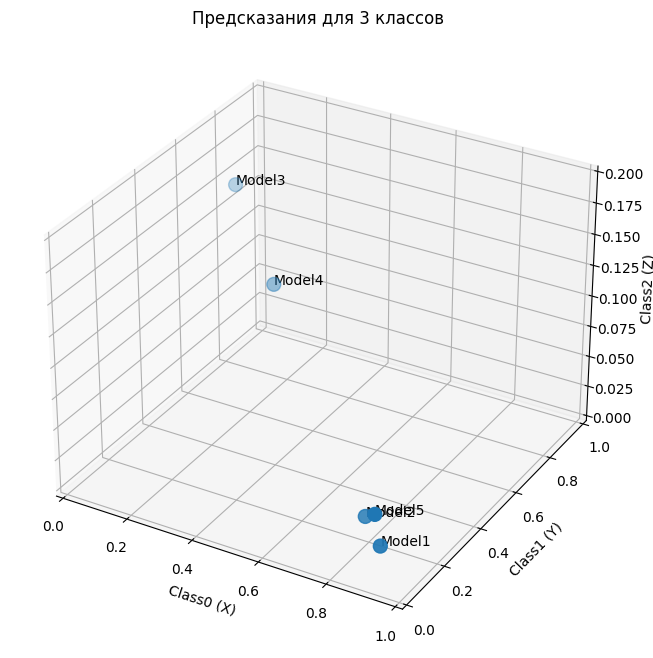

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Define the data
data = {
    'Модель': ['Model1', 'Model2', 'Model3', 'Model4', 'Model5'],
    'Class0 (X)': [0.9, 0.8, 0.01, 0.25, 0.9],
    'Class1 (Y)': [0.08, 0.18, 0.85, 0.65, 0.05],
    'Class2 (Z)': [0.02, 0.02, 0.14, 0.10, 0.05]
}
df = pd.DataFrame(data)

# 2. Create the 3D plot figure and axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 3. Scatter plot the points
ax.scatter(df['Class0 (X)'], df['Class1 (Y)'], df['Class2 (Z)'], s=100)

# 4. Label each point with its class name
for i, row in df.iterrows():
    ax.text(row['Class0 (X)'], row['Class1 (Y)'], row['Class2 (Z)'], row['Модель'], size=10, zorder=1, color='k')

# 5. Set labels, title, and limits
ax.set_xlabel('Class0 (X)')
ax.set_ylabel('Class1 (Y)')
ax.set_zlabel('Class2 (Z)')
ax.set_title('Предсказания для 3 классов')

# Adjust axes limits for a better view of the clusters
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 0.2) 
ax.grid(True)
plt.show()

##### Голосование большинством

In [25]:
# Объединим результаты 5 моделей
print("Вероятностные оценки 5 моделей по 3 классам:")
print(result_predicts)
# Выберем номер элемента/класс с максимальным значением 
clfs_classes = result_predicts.argmax(axis=1)
print("Результаты предсказаний 5 моделей по 3 классам:")
print(clfs_classes)

# Считаем количесто классов
counts = np.bincount(clfs_classes)
hard_result_class = np.argmax(counts)
print("Распределение количества голосов для 3 классов:")
print(counts)
print(f"Итоговый класс: {hard_result_class}")

Вероятностные оценки 5 моделей по 3 классам:
[[0.9  0.08 0.02]
 [0.1  0.8  0.1 ]
 [0.01 0.85 0.14]
 [0.25 0.65 0.1 ]
 [0.05 0.9  0.05]]
Результаты предсказаний 5 моделей по 3 классам:
[0 1 1 1 1]
Распределение количества голосов для 3 классов:
[1 4]
Итоговый класс: 1


##### Мягкое голосование

In [8]:
import numpy as np

# Каждая модель прогнозирует вероятностное распределение для 3-х классов
Cls1 = [0.9, 0.08, 0.02]
Cls2 = [0.8, 0.18, 0.02]
Cls3 = [0.01, 0.85, 0.14]
Cls4 = [0.25, 0.65, 0.10]
Cls5 = [0.9, 0.05, 0.05]

result_predicts = np.stack([Cls1, Cls2, Cls3, Cls4, Cls5])
print("Вероятностные оценки 5 моделей по 3 классам:")
print(result_predicts)

#Подсчитаем среднее значение для каждого столбца
avg_by_clfs = result_predicts.mean(axis=0)
print("Средняя вероятность по 5 моделям для 3 классов:")
print(avg_by_clfs)
soft_result_class = np.argmax(avg_by_clfs)

print(f"Мягкое голосование. Итоговый класс: {soft_result_class}")

Вероятностные оценки 5 моделей по 3 классам:
[[0.9  0.08 0.02]
 [0.8  0.18 0.02]
 [0.01 0.85 0.14]
 [0.25 0.65 0.1 ]
 [0.9  0.05 0.05]]
Средняя вероятность по 5 моделям для 3 классов:
[0.572 0.362 0.066]
Мягкое голосование. Итоговый класс: 0


#### Взвешенное голосование

In [ ]:
import numpy as np

# Каждая модель прогнозирует вероятностное распределение для 3-х классов
Cls1 = [0.9, 0.08, 0.02]
Cls2 = [0.8, 0.18, 0.02]
Cls3 = [0.01, 0.85, 0.14]
Cls4 = [0.25, 0.65, 0.10]
Cls5 = [0.9, 0.05, 0.05]

#Изменим вес для 5 моделей
weights = np.array([[1,1,3,1,1]])
result_predicts = np.stack([Cls1, Cls2, Cls3, Cls4, Cls5])

# Изменим выход предсказаний
weighted_predicts = weights.T*result_predicts
print(f"Взвешенные предсказания: \n {weighted_predicts}")

# Среднее по столбцам
avg_by_cls = weighted_predicts.mean(axis=0)
print(f"Среднее для каждого класса: \n {avg_by_cls}")

soft_result_class = np.argmax(avg_by_cls)
print(f"Мягкое голосование. Итоговый класс: {soft_result_class}")

Взвешенные предсказания: 
 [[0.9  0.08 0.02]
 [0.8  0.18 0.02]
 [0.03 2.55 0.42]
 [0.25 0.65 0.1 ]
 [0.9  0.05 0.05]]
Среднее для каждого класса: 
 [0.576 0.702 0.122]
Мягкое голосование. Итоговый класс: 1


#### VotingClassifier в Sklearn

<b>sklearn.ensemble.VotingClassifier(estimators, *, voting='hard', weights=None, n_jobs=None, flatten_transform=True, verbose=False)</b> <br><br>
Параметры: <br>
- estimators: список кортежей, где каждый кортеж содержит имя модели (строка) и экземпляр классификатора.
- voting: определяет метод объединения прогнозов: 'hard' или 'soft'. По умолчанию используется 'hard'.
- weights: список весов, которые присваиваются каждой базовой модели при объединении прогнозов. Если не указаны, все модели считаются равнозначными.
- n_jobs: количество параллельных процессов, используемых для обучения базовых моделей. Значение -1 означает использование всех доступных процессоров.


#### Пример 1. Класс VotingClassifier на синтетических данных

In [28]:
from itertools import product
import numpy as np
from matplotlib import pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier

In [29]:
# Создадим набор синтетических данных
X = np.array([[-1.0, -1.0], [-1.2, -1.4], [-3.4, -2.2], [1.1, 1.2]])
y = np.array([1, 1, 2, 2])

Text(0, 0.5, 'X2')

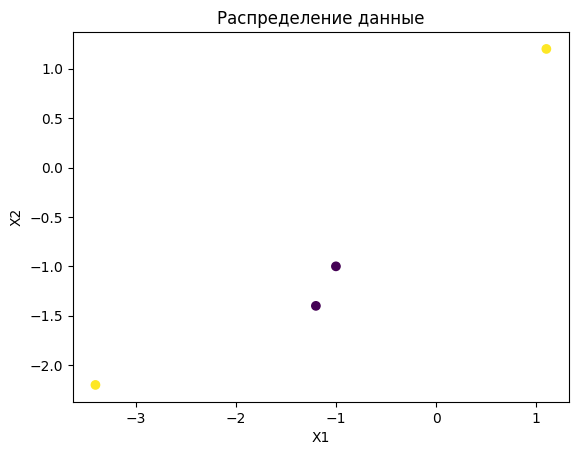

In [32]:
plt.title("Распределение данные")
plt.scatter(x=X[:,0], y=X[:,1], c=y)
plt.xlabel("X1")
plt.ylabel("X2")

In [33]:
clf1 = LogisticRegression(random_state=1)
clf2 = SVC(kernel = 'linear', probability=True)
clf3 = KNeighborsClassifier(n_neighbors=2)

# обучаем каждую модель и получаем предсказания
probas = [c.fit(X, y).predict_proba(X) for c in (clf1, clf2, clf3)]

In [35]:
print(f"Предсказания LogRegression: \n {probas[0]}")

Предсказания LogRegression: 
 [[0.52574235 0.47425765]
 [0.5590339  0.4409661 ]
 [0.50610728 0.49389272]
 [0.40911654 0.59088346]]


Text(0.5, 1.0, 'LogisticRegression')

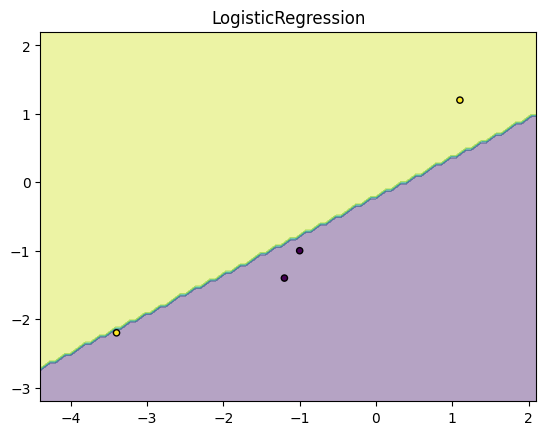

In [36]:
DecisionBoundaryDisplay.from_estimator(clf1, X, alpha=0.4, response_method="predict")
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
plt.title("LogisticRegression")

In [37]:
print(f"Предсказания SVC: \n {probas[1]}")

Предсказания SVC: 
 [[0.58158149 0.41841851]
 [0.5310024  0.4689976 ]
 [0.52190481 0.47809519]
 [0.77831441 0.22168559]]


Text(0.5, 1.0, 'SVC')

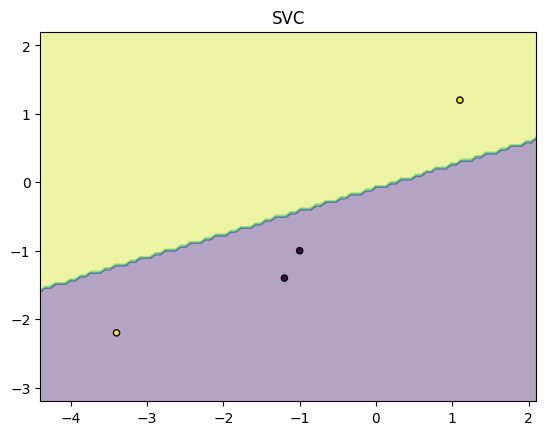

In [38]:
DecisionBoundaryDisplay.from_estimator(clf2, X, alpha=0.4, response_method="predict")
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
plt.title("SVC")

In [39]:
print(f"Предсказания KNeighbors: \n {probas[2]}")

Предсказания KNeighbors: 
 [[1.  0. ]
 [1.  0. ]
 [0.5 0.5]
 [0.5 0.5]]


Text(0.5, 1.0, 'Kneighbors')

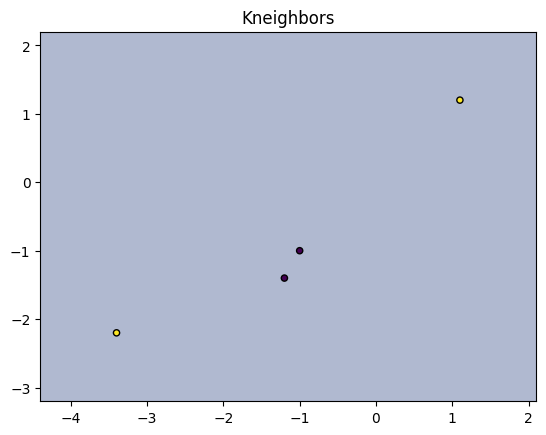

In [40]:
DecisionBoundaryDisplay.from_estimator(clf3, X, alpha=0.4, response_method="predict")
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
plt.title("Kneighbors")

In [41]:
# Обучим модели классификации
ensebmle_clf_hard = VotingClassifier(estimators=[('lr', clf1), ('svc', clf2), ('knb', clf3)], voting='hard')
fitted_ensemble_clf_hard = ensebmle_clf_hard.fit(X, y)
print(ensebmle_clf_hard.predict(X))

[1 1 1 2]


Text(0.5, 1.0, 'Голосование моделей')

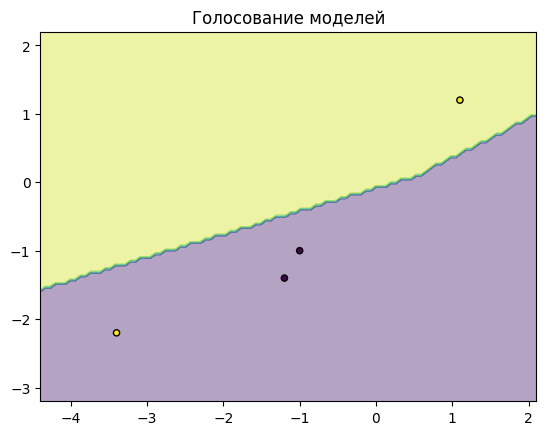

In [42]:
DecisionBoundaryDisplay.from_estimator(fitted_ensemble_clf_hard, X, alpha=0.4, response_method="predict")
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
plt.title("Голосование моделей")

In [44]:
ensebmle_clf_soft = VotingClassifier(estimators=[('lr', clf1), ('svc', clf2), ('knb', clf3)], voting='soft')
fitted_ensebmle_clf_soft = ensebmle_clf_soft.fit(X, y)
print(fitted_ensebmle_clf_soft.predict_proba(X))
print(fitted_ensebmle_clf_soft.predict(X))

[[0.70244128 0.29755872]
 [0.69667876 0.30332124]
 [0.50933736 0.49066264]
 [0.56247698 0.43752302]]
[1 1 1 1]


Text(0.5, 1.0, 'Мягкое голосование')

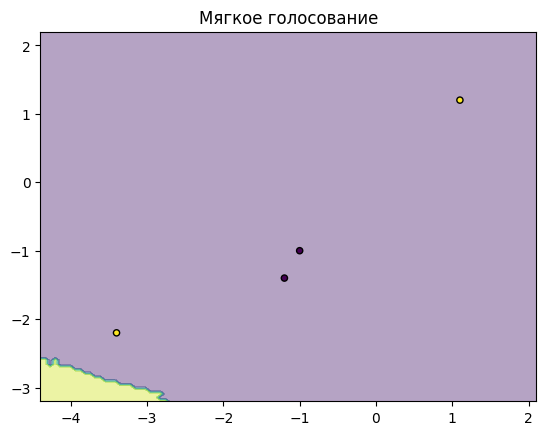

In [45]:
DecisionBoundaryDisplay.from_estimator(fitted_ensebmle_clf_soft, X, alpha=0.4, response_method="predict")
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
plt.title("Мягкое голосование")

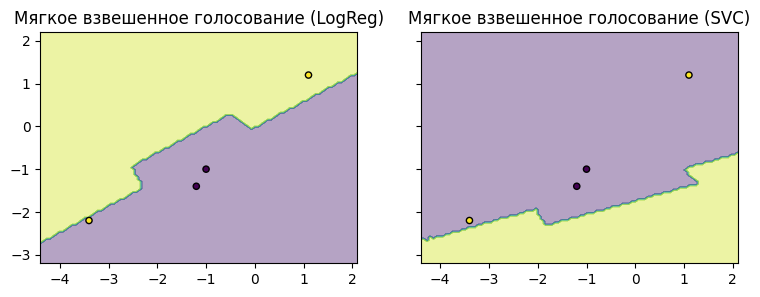

In [46]:
# Реализуем взвешенное голосование c усилинием LogRegression
ensebmle_clf_weighted_lr = VotingClassifier(
        estimators=[('lr', clf1), ('svc', clf2), ('knb', clf3)],
        voting="soft",
        weights=[0.8, 0.1, 0.1],)
fitted_ensebmle_clf_weighted_lr = ensebmle_clf_weighted_lr.fit(X, y)

# Реализуем взвешенное голосование c усилинием SVC
ensebmle_clf_weighted_svc = VotingClassifier(
        estimators=[('lr', clf1), ('svc', clf2), ('knb', clf3)],
        voting="soft",
        weights=[0.1, 0.8, 0.1],)
fitted_ensebmle_clf_weighted_svc = ensebmle_clf_weighted_svc.fit(X, y)

# Границы решений
f, axarr = plt.subplots(1, 2, sharex="col", sharey="row", figsize=(9, 3))
for idx, clf, tt in zip(
        product([0, 1], [0, 1]),
        [ensebmle_clf_weighted_lr, ensebmle_clf_weighted_svc],
        ["Мягкое взвешенное голосование (LogReg)", "Мягкое взвешенное голосование (SVC)"],
    ):
    DecisionBoundaryDisplay.from_estimator(
        clf, X, alpha=0.4, ax=axarr[idx[1]], response_method="predict"
    )
    axarr[idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
    axarr[idx[1]].set_title(tt)


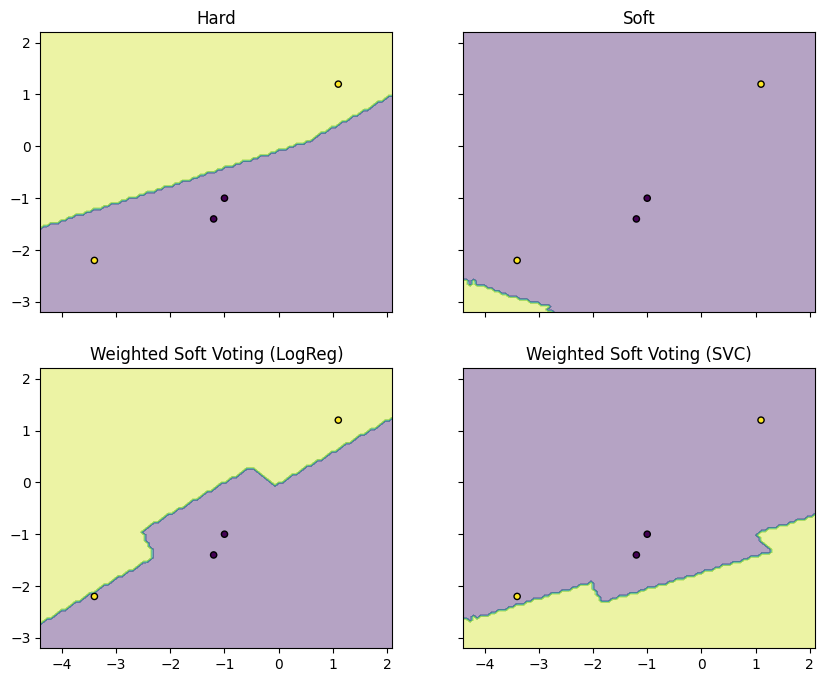

In [47]:
#Отобразим границы решений всех вариантов
f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(10, 8))
for idx, clf, tt in zip(
    product([0, 1], [0, 1]),
    [ensebmle_clf_hard, ensebmle_clf_soft, ensebmle_clf_weighted_lr, ensebmle_clf_weighted_svc],
    ["Hard", "Soft", "Weighted Soft Voting (LogReg)", "Weighted Soft Voting (SVC)"],
):
    DecisionBoundaryDisplay.from_estimator(
        clf, X, alpha=0.4, ax=axarr[idx[0], idx[1]], response_method="predict"
    )
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

#### Класс VotingRegressor

<b>sklearn.ensemble.VotingRegressor(estimators, *, weights=None, n_jobs=None, verbose=False)</b> <br>
- estimators: список кортежей, где каждый кортеж содержит имя модели (строка) и экземпляр регрессора.
- weights: список весов, которые присваиваются каждой базовой модели при усреднении прогнозов. Если не указаны, все модели считаются равнозначными.
- n_jobs: количество параллельных процессов, используемых для обучения базовых моделей. Значение -1 означает использование всех доступных процессоров.

In [48]:
import matplotlib.pyplot as plt

from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [49]:
# Создадим массив данных
X = np.array([[1, 1], [2, 4], [3, 9], [4, 16], [5, 25], [6, 36]])
y = np.array([2, 6, 12, 20, 30, 42])

Text(0.5, 1.0, 'Распределение целевой переменной')

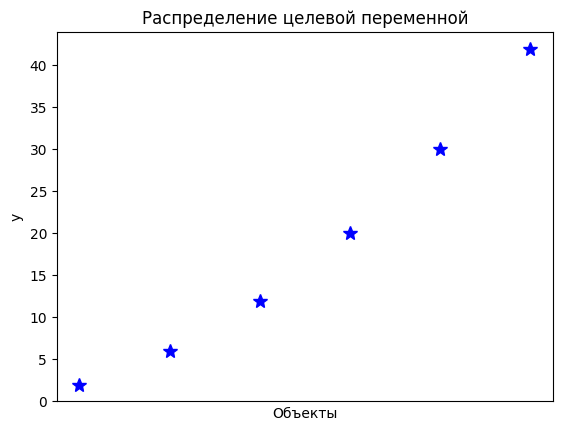

In [50]:
plt.figure()
plt.plot(y, "b*", ms=10, label="Данные")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("y")
plt.xlabel("Объекты")
plt.title("Распределение целевой переменной")

In [51]:
# Создадим модели регрессии
reg1 = DecisionTreeRegressor()
reg2 = LinearRegression()
reg3 = SVR()

# Обучим каждую модель в отдельности
reg1.fit(X, y)
reg2.fit(X, y)
reg3.fit(X, y)

# Реализуем ансамбль с голосованием
ereg = VotingRegressor([("dt", reg1), ("lr", reg2), ("svr", reg3)])
ereg.fit(X, y)

VotingRegressor(estimators=[('dt', DecisionTreeRegressor()),
                            ('lr', LinearRegression()), ('svr', SVR())])

In [53]:
# Получим предсказания
xt = X
# Для каждой модели по отдельности
pred1 = reg1.predict(xt)
pred2 = reg2.predict(xt)
pred3 = reg3.predict(xt)

# Ансамбль моделей
pred4 = ereg.predict(xt)

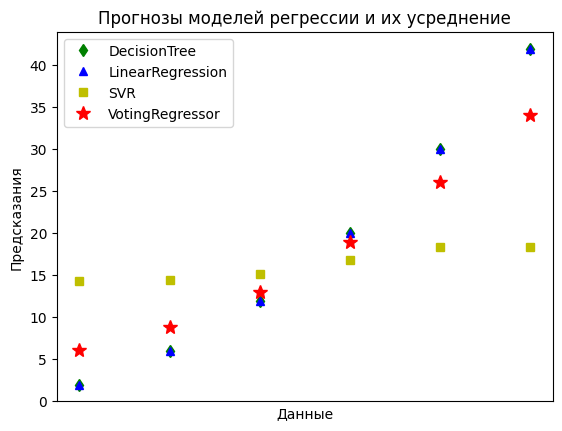

In [54]:
plt.figure()
plt.plot(pred1, "gd", label="DecisionTree")
plt.plot(pred2, "b^", label="LinearRegression")
plt.plot(pred3, "ys", label="SVR")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("Предсказания")
plt.xlabel("Данные")
plt.legend(loc="best")
plt.title("Прогнозы моделей регрессии и их усреднение")

plt.show()

### Самостоятельная работа

Датасет:<br>iris.csv<br>
1. Загрузить данные
2. Закодировать целевую переменную с помощью LabelEncoder
3. Разделить на данные и целевую переменные
4. Создать три модели классификатора

LogisticRegression()<br>
SVC(probability=True, kernel='rbf')<br>
KNeighborsClassifier(n_neighbors=3)<br>

5. Обучить каждую модель с помощью кросс-валидации (Параметры: cv=10, scoring="accuracy")
6. Сохранить средние метрики в переменные lr (LogisticRegression), svc(SVC), knn (KNeighborsClassifier)
7. Обучить VotingClassifier с параметром voting='hard' с помощью кросс-валидации
8. Найти среднее значение accuracy. Сохранить в переменную hard_v_cls.
9. Обучить VotingClassifier с параметром voting='soft' с помощью кросс-валидации
10. Найти среднее значение accuracy. Сохранить в переменную soft_v_cls
11. С помощью GridSearchCV реализуйте взвешенное голосование, увеличивая последовательно вес каждой модели. Сохраните точность в переменную accuracy_gridcv.

Результат отправьте в контест

Критерии прохождения:
- lr>=0.8              
- svc>=0.8           
- knn>=0.75:
- hard_v_cls>=0.8
- soft_v_cls>=0.8
- accuracy_gridcv>=0.8

### Пример класссификация на реальных данных

In [273]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import classification_report

##### Загрузка данных

Набор данных для прогнозирования сердечной недостаточности <br>
https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

Признаки:
- Age: возраст [года]
- Sex: пол [M: Мужскойe, F: Женский]
- ChestPainType: Тип боли в груди [TA: Типичная стенокардия, ATA: Атипичная стенокардия, NAP: Неангинальная боль, ASY: Бессимптомно]
- RestingBP: давление крови в состоянии покоя [mm Hg]
- Cholesterol: уровень холестерина в сыворотке крови [mm/dl]
- FastingBS: уровень сахара в крови натощак [1: если уровень сахара в крови натощак > 120 мг/дл, 0: иначе]
- RestingECG: Результаты электрокардиограммы в покое 
[
    Normal: Нормально, 
    ST: наличие отклонений ST-T волны (инверсии T-волны и/или подъема или депрессии ST > 0,05 мВ), 
    LVH: признаки вероятной или явной гипертрофии левого желудочка по критериям Эстеса
    ]
- MaxHR: максимальная достигнутая частота сердечных сокращений [Числовое значение между 60 и 202]
- ExerciseAngina: стенокардия, вызванная физической нагрузкой [Y: Да, N: Нет]
- Oldpeak: числовое значение, которое характеризует глубину депрессии сегмента ST - отрезок на ЭКГ, который отражает период реполяризации желудочков сердца.
- ST_Slope: Наклон сегмента ST на пике физической нагрузки [Up: восходящий, Flat: горизонтальный, Down: нисходящий]
- HeartDisease: итоговый класс [1: наличие заболевания сердца., 0: нормальное состояние]

In [ ]:
!pip install kagglehub

In [58]:
try:
    raw_df = pd.read_csv('data/heart.csv')
except:
    import kagglehub
    import shutil
    from pathlib import Path

    path = Path(kagglehub.dataset_download("fedesoriano/heart-failure-prediction"))
    print("Path to dataset files:", path)
    shutil.move(path.joinpath("heart.csv"), "data")
    raw_df = pd.read_csv('heart.csv')

In [59]:
raw_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [60]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


##### Анализ данных

Text(0.5, 1.0, 'Здоровый vs Болезнь сердца')

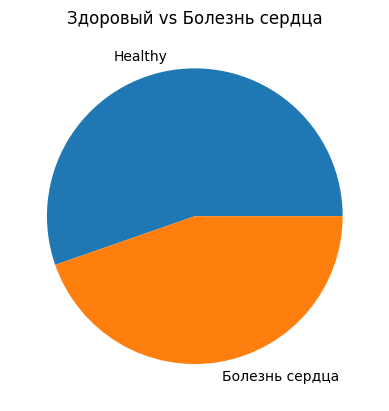

In [61]:
labels=["Healthy","Болезнь сердца"]

healthy_or_not = raw_df['HeartDisease'].value_counts().tolist()
values = [healthy_or_not[0], healthy_or_not[1]]

fig = plt.pie(
    x=raw_df['HeartDisease'].value_counts(), 
    labels=labels
    )
plt.title("Здоровый vs Болезнь сердца")


In [62]:
# Выберем числовые столбцы ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
numerical_columns = raw_df.select_dtypes([int, float])
numerical_columns.drop(labels=['HeartDisease'], axis=1, inplace=True)

# Выберем категориальные столбцы ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
categorical_columns = raw_df.select_dtypes([object])

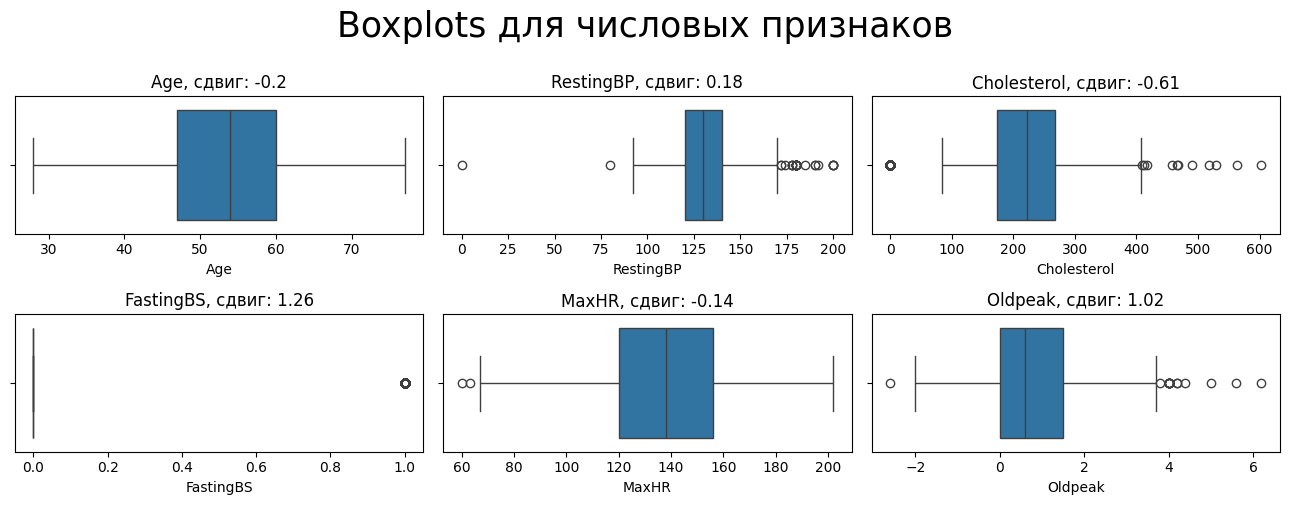

In [64]:
import seaborn as sns
#Проверим выбросы
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(13,5))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', сдвиг: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=raw_df, columns_list=numerical_columns, rows=2, cols=3, suptitle='Boxplots для числовых признаков')
plt.tight_layout()

Проверим выбросы:

Метод Тьюки, также известный как метод межквартильного размаха (IQR) — это статистический способ обнаружения выбросов в данных. 
Он основан на использовании квартилей, которые делят упорядоченный набор данных на четыре равные части.

In [69]:
from collections import Counter

def IQR_method (df: pd.DataFrame, thr: int, features: list):
    """
    Принимает DataFrame (таблицу данных) и возвращает список индексов, 
    соответствующих наблюдениям, содержащим более n выбросов, 
    определенных методом Тьюки (межквартильный размах, IQR).
    """
    outlier_list = []
    
    # переберем все признаки
    for column in features:
        # 1 квантиль (25%)
        Q1 = np.percentile(df[column], 25)
        # 3 квантиль (75%)
        Q3 = np.percentile(df[column],75)
        # Межквартильный размах (IQR)
        IQR = Q3 - Q1
        # граница выброса
        outlier_step = 1.5 * IQR        
        # Определение списка индексов выбросов
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index
        # добавление в список выбросов
        outlier_list.extend(outlier_list_column)
        
    # Выбор индексов, содержащих более thr выбросов
    outlier_list = Counter(outlier_list)
    # если строка содержит больше thr выбросов то добавляем её в кандидаты на удаление
    multiple_outliers = list( k for k, v in outlier_list.items() if v > thr)
    
    # Вычислим количество записей ниже нижней границы и выше верхней границы, соответственно.
    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]
    
    print('Общее число удаленных выбросов:', out1.shape[0]+out2.shape[0])
    
    return multiple_outliers

In [70]:
# Поиск выбросов
Outliers_IQR = IQR_method(raw_df,1,numerical_columns)

# Удаление выбросов
df = raw_df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Общее число удаленных выбросов: 16


### Самостоятельная работа

Датасет:<br>heart.csv<br>
1. Загрузить данные
2. Найти количество данных по каждому классу. Сохраните в переменные count_cl1, count_cl2.
3. Удалить выбросы
4. Закодировать признаки с типом объект
5. Разделить данные на признаки и целевую переменную
6. Разделить на подвыборки для обучения и тестовую
7. Масштабировать признаки
8. Создать модели классификаторов:

LogisticRegression(solver ='lbfgs', multi_class ='multinomial', max_iter = 200)<br>
KNeighborsClassifier()<br>
SVC(gamma ='auto', probability = True)<br>

9. Обучить VotingClassifier с параметром voting='hard' с помощью кросс-валидации с параметрами cv=5, scoring='recall'
10. Найти среднее значение recall. Сохранить в переменную VC_hard_cv_score.
11. Обучить VotingClassifier с параметром voting='soft' с помощью кросс-валидации с параметрами cv=5, scoring='recall'
12. Найти среднее значение recall. Сохранить в переменную VC_soft_cv_score.
13. Определить площадь под кривой. Сохранить в переменную ROCAUCscore.

Отправить в контест. <br>
Критерии прохождения задания:
- Найдены значения количества данных в каждом классе (count_cl1,count_cl2)
- VC_hard_cv_score >= 0.84
- VC_soft_cv_score >= 0.87
- ROCAUCscore >= 0.88